In [1]:
"""
Notes:
We use autoencoder for dmensionalty deruction and noise removal
we will sometimes use historical data with correct labels, however during the actual use of the model
we wont be able to use our previous evaluation metrics
Sometimes sem-supervised becouse we have the ability to use corrent labels, but actually using the autoencoder
we can't produce metrics such as accuracy or RMSE
"""

'\nNotes:\nWe use autoencoder for dmensionalty deruction and noise removal\nwe will sometimes use historical data with correct labels, however during the actual use of the model\nwe wont be able to use our previous evaluation metrics\n'

In [2]:
# The autoencoder is actually a very simple neural network and will feel similar to a multi-layer perceptron model
# its designed to reproduce its input at the autput layer
# The key difference between an autoencoder and a typical MLP network is that the number of input neurons is equal to the number of output neurons
# 

### Dimensionality Reduction

In [4]:
# Dimensionality Reduction
# Compress Data
# Visualize data in lower dimenstions
# Receal hidden relationship not clearly seen in high dimensions

In [5]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from sklearn.datasets import make_blobs

In [7]:
data = make_blobs(n_samples=300,
                 n_features=2,
                 centers=2,
                 cluster_std=1.0,
                 random_state=101)

In [8]:
X,y = data

In [12]:
np.random.seed(seed=101)
z_noise = np.random.normal(size=len(X))
z_noise = pd.Series(z_noise)

In [13]:
z_noise

0      2.706850
1      0.628133
2      0.907969
3      0.503826
4      0.651118
         ...   
295    1.523750
296    1.290230
297   -1.478319
298    0.214234
299   -0.240510
Length: 300, dtype: float64

In [14]:
feat = pd.DataFrame(X)

In [15]:
feat

,0,1
0,-8.877721,-6.760078
1,0.630638,3.107075
2,-0.240609,2.820690
3,-7.839091,-8.207545
4,-10.972908,-7.390676
...,...,...
295,1.320546,2.605592
296,-8.043916,-6.010589
297,-9.733566,-7.460380
298,-10.722075,-5.568565


In [16]:
feat = pd.concat([feat,z_noise],axis=1)

In [22]:
feat.columns = ['X1','X2','X3']

In [23]:
feat

,X1,X2,X3
0,-8.877721,-6.760078,2.706850
1,0.630638,3.107075,0.628133
2,-0.240609,2.820690,0.907969
3,-7.839091,-8.207545,0.503826
4,-10.972908,-7.390676,0.651118
...,...,...,...
295,1.320546,2.605592,1.523750
296,-8.043916,-6.010589,1.290230
297,-9.733566,-7.460380,-1.478319
298,-10.722075,-5.568565,0.214234


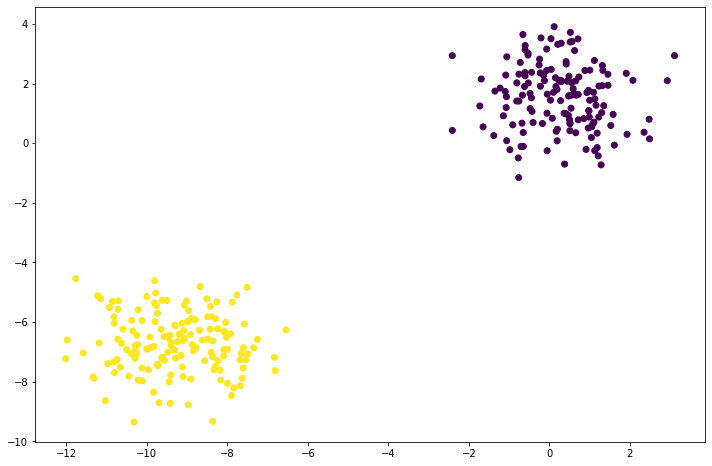

In [25]:
plt.figure(figsize=(12,8))
plt.scatter(feat['X1'],feat['X2'],c=y)

In [35]:
from mpl_toolkits.mplot3d import Axes3D

In [36]:
#%matplotlib notebook

<IPython.core.display.Javascript object>


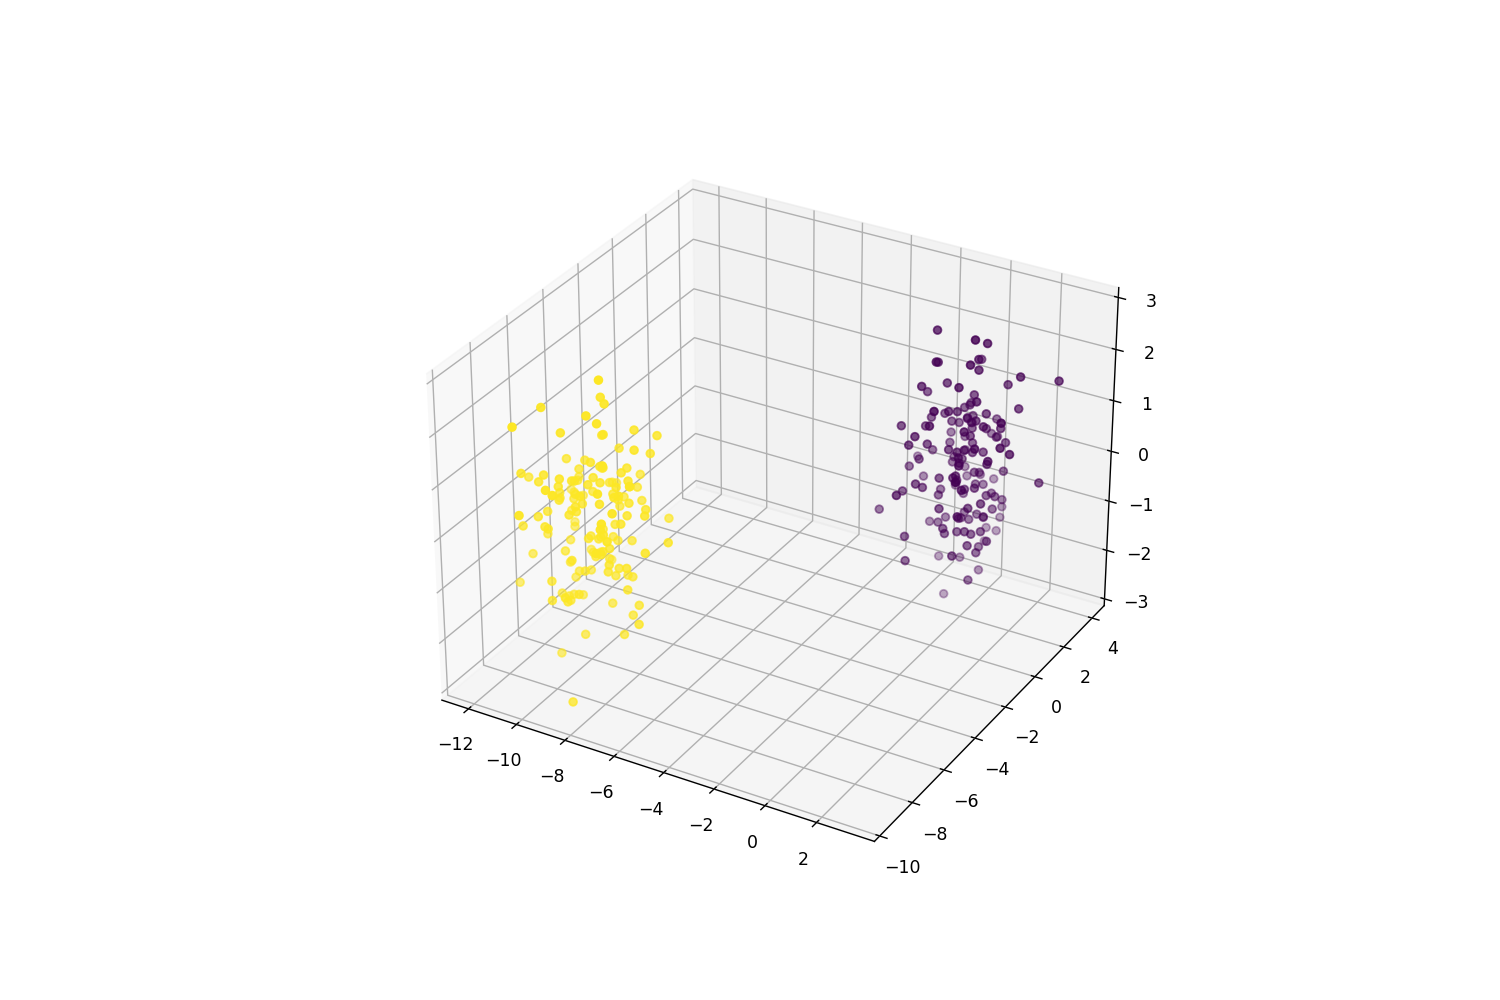

In [37]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(feat['X1'],feat['X2'],feat['X3'],c=y)

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [39]:
from tensorflow.keras.optimizers import SGD

In [67]:
encoder = Sequential()
encoder.add(Dense(units=2,activation='relu',input_shape=[3]))

In [68]:
decoder = Sequential()
decoder.add(Dense(units=3,activation='relu',input_shape=[2]))

In [69]:
autoencoder = Sequential([encoder,decoder])

In [70]:
autoencoder.compile(loss='mse',optimizer=SGD(learning_rate=1.5))

In [71]:
from sklearn.preprocessing import MinMaxScaler

In [72]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(feat)

In [73]:
autoencoder.fit(scaled_data,scaled_data,epochs=10)

Epoch 1/10
10/10 [==============================] - 0s 8ms/step - loss: 0.2925
Epoch 2/10
10/10 [==============================] - 0s 7ms/step - loss: 0.2298
Epoch 3/10
10/10 [==============================] - 0s 7ms/step - loss: 0.2249
Epoch 4/10
10/10 [==============================] - 0s 7ms/step - loss: 0.2227
Epoch 5/10
10/10 [==============================] - 0s 8ms/step - loss: 0.2219
Epoch 6/10
10/10 [==============================] - 0s 7ms/step - loss: 0.2219
Epoch 7/10
10/10 [==============================] - 0s 10ms/step - loss: 0.2212
Epoch 8/10
10/10 [==============================] - 0s 7ms/step - loss: 0.2211
Epoch 9/10
10/10 [==============================] - 0s 7ms/step - loss: 0.2208
Epoch 10/10
10/10 [==============================] - 0s 8ms/step - loss: 0.2206


In [74]:
encoded_2dim = encoder.predict(scaled_data)

In [75]:
encoded_2dim.shape

(300, 2)

In [76]:
scaled_data.shape

(300, 3)

<IPython.core.display.Javascript object>


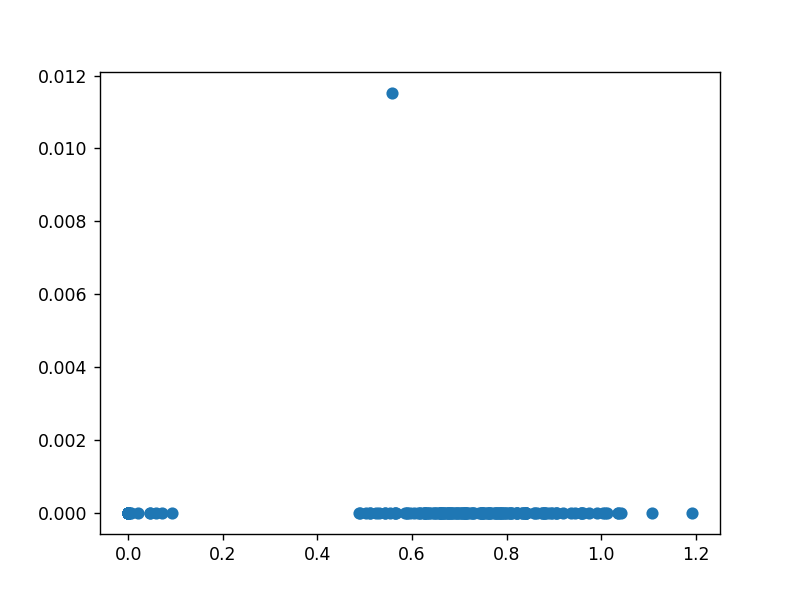

In [77]:
plt.scatter(encoded_2dim[:,0],encoded_2dim[:,1])